In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import swifter

Here we will add a transformation to the flow, arrivals, and departures called the log-modulus transformation (Found here: https://bit.ly/33Nm8Tm). This transformation is characterized as follows: 

L(x) = sign(x) * log(|x| + 1)

This transformation has several advantages: 

First, it can be applied to positive and negative numbers, so it is applicable for our "flow" axis. This is possible, because it takes the log of the absolute value and multiplies it by the point's sign. 

Second, it preserves zero. This is advantageous, as we have many data points with zero flow, so preserving this is essential. 

Third, it has high interpretability, as it simply applies a logarithmic scale to all data points. 

In [18]:
sch_data = pd.read_csv('data/cleaned/schwartau/schwartau.csv') #Read in the data
sch_data['timestamp'] = pd.to_datetime(sch_data['timestamp']) #Ensure that timestamp is a datetime object
sch_data = sch_data.set_index('timestamp')

#Add columns to the dataframe with year, month, and weekday name
sch_data['year'] = sch_data.index.year
sch_data['month'] = sch_data.index.month
sch_data['weekday name'] = sch_data.index.weekday_name

#Add a column for log-mod of flow, arrivals, and departures
def logmod(x):
    return np.sign(x) * np.log(abs(x) + 1)

sch_data['logflow'] = sch_data['flow'].swifter.apply(logmod)
sch_data['logarrivals'] = sch_data['arrivals'].swifter.apply(logmod)
sch_data['logdepartures'] = sch_data['departures'].swifter.apply(logmod)

sch_data.head()

,flow,arrivals,departures,temperature,year,month,weekday name,logflow,logarrivals,logdepartures
timestamp,,,,,,,,,,
2017-01-01 14:15:00,0,0,0,12.340,2017,1,Sunday,0.0,0.0,0.0
2017-01-01 14:30:00,0,0,0,12.356,2017,1,Sunday,0.0,0.0,0.0
2017-01-01 14:45:00,0,0,0,12.492,2017,1,Sunday,0.0,0.0,0.0
2017-01-01 15:00:00,0,0,0,12.454,2017,1,Sunday,0.0,0.0,0.0
2017-01-01 15:15:00,0,0,0,12.378,2017,1,Sunday,0.0,0.0,0.0


Break the data into years so that we can do analysis on each year individually.

In [19]:
#Print some info about each year
print("Overall Dataset:")
print("Length of overall dataset: " + str(len(sch_data)) + " data points.")
print(sch_data.head())
print("Overall data maximums:")
print(sch_data.max())
print("Overall data minimums:")
print(sch_data.min())

Overall Dataset:
Length of overall dataset: 83784 data points.
                     flow  arrivals  departures  temperature  year  month  \
timestamp                                                                   
2017-01-01 14:15:00     0         0           0       12.340  2017      1   
2017-01-01 14:30:00     0         0           0       12.356  2017      1   
2017-01-01 14:45:00     0         0           0       12.492  2017      1   
2017-01-01 15:00:00     0         0           0       12.454  2017      1   
2017-01-01 15:15:00     0         0           0       12.378  2017      1   

                    weekday name  logflow  logarrivals  logdepartures  
timestamp                                                              
2017-01-01 14:15:00       Sunday      0.0          0.0            0.0  
2017-01-01 14:30:00       Sunday      0.0          0.0            0.0  
2017-01-01 14:45:00       Sunday      0.0          0.0            0.0  
2017-01-01 15:00:00       Sunday     

Plot averages for each year of data that we have

Find the average distance between closest points


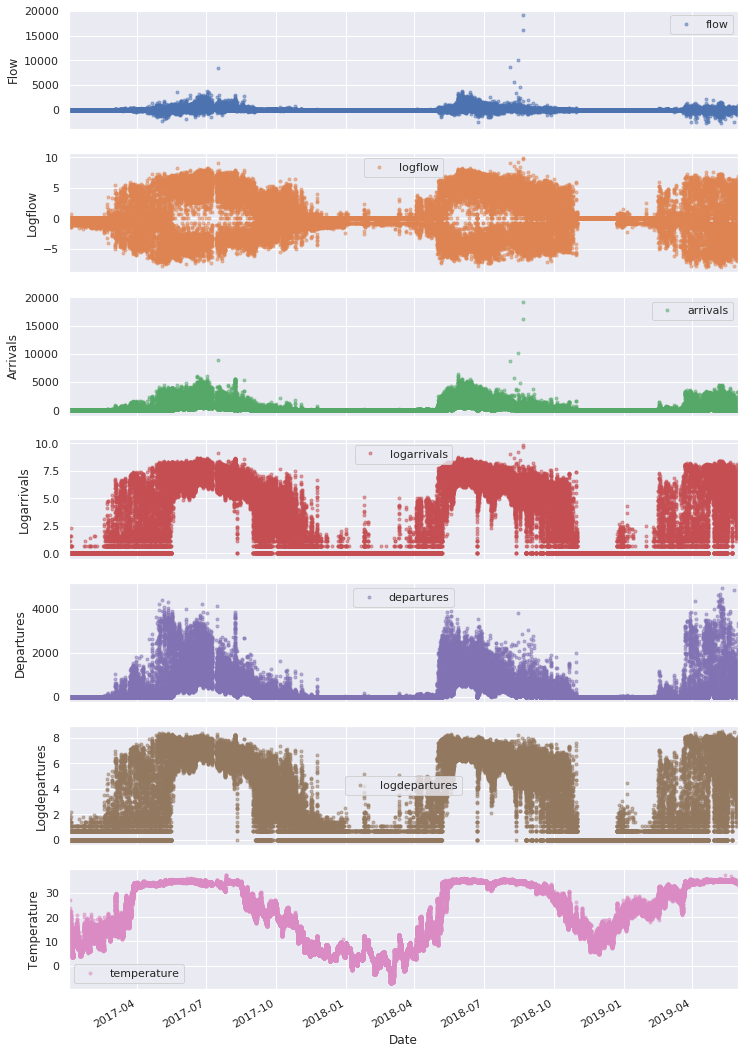

In [20]:
#Set the default figure size with seaborn
sns.set(rc={'figure.figsize':(11, 4)})

data_plots = ['flow', 'logflow', 'arrivals', 'logarrivals', 'departures', 'logdepartures', 'temperature']
axes = sch_data[data_plots].plot(marker='.', alpha=0.5, linestyle='None', subplots=True,figsize=(12,20))
for i in range(len(axes)):
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(data_plots[i].capitalize())


From the above plots of our timeseries data, we can begin to see some basic trends, and some trends that are more novel. 

For instance, as one would expect, the bees are much more active during periods 

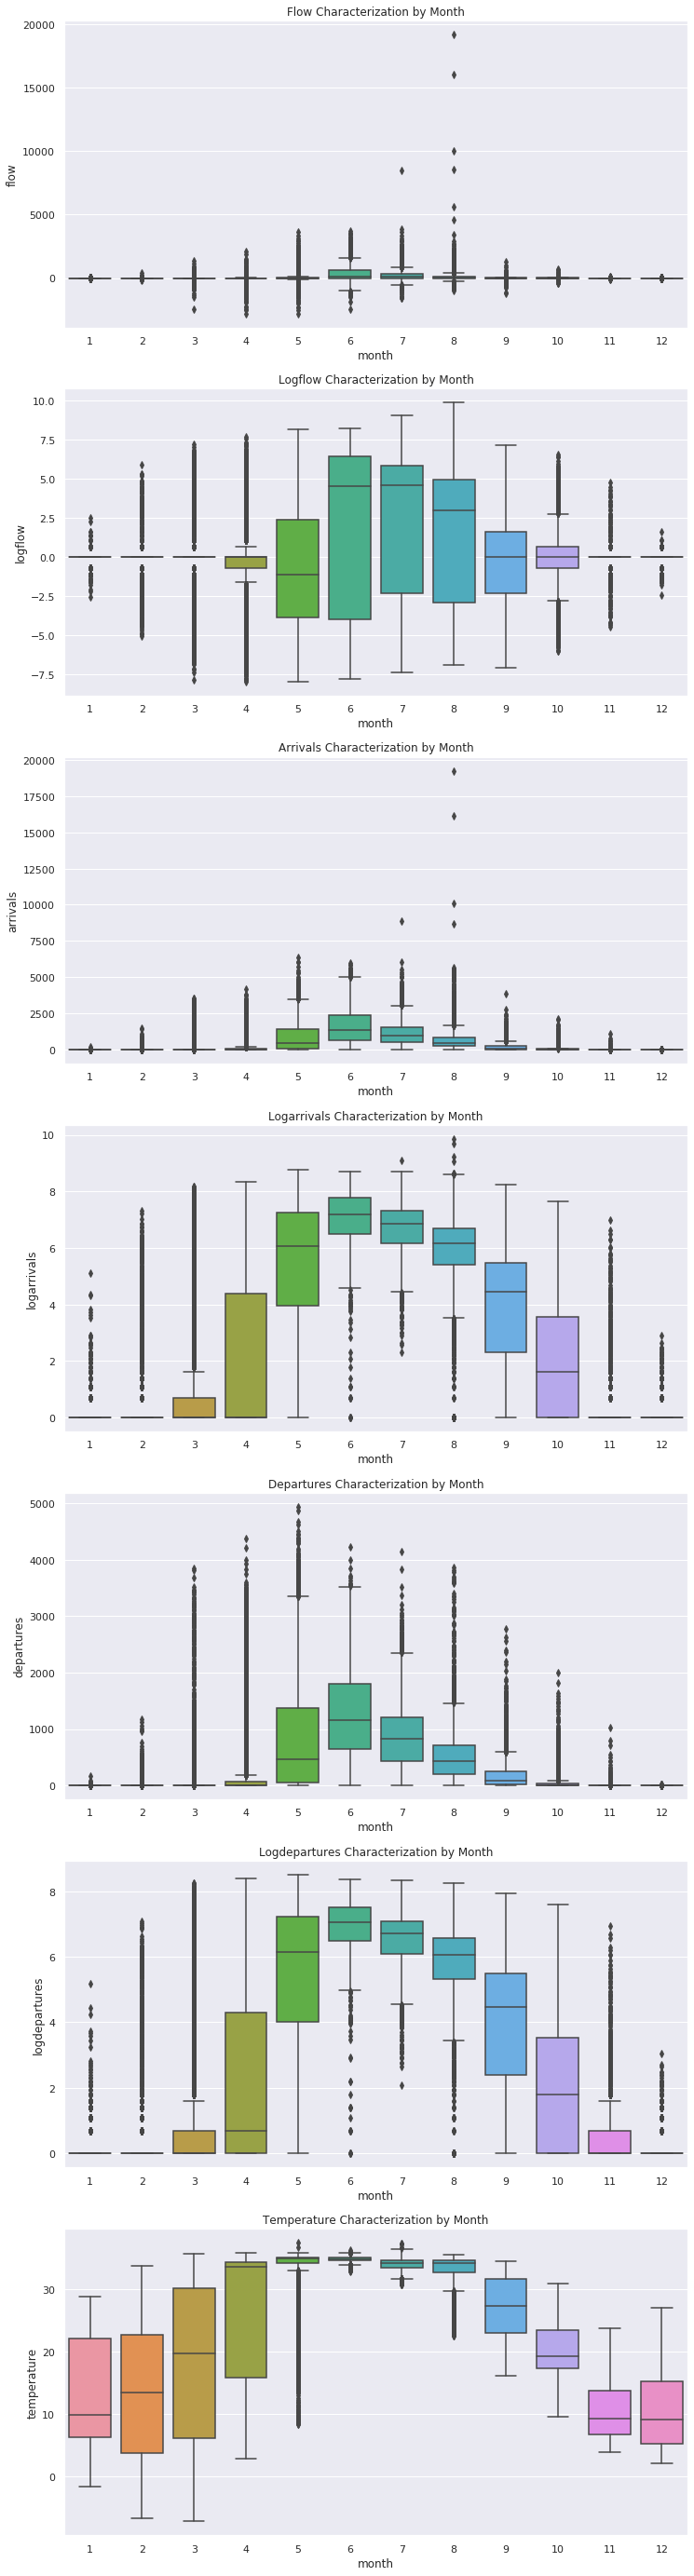

In [36]:
seasonal_fig, seasonal_axes = plt.subplots(7, 1, figsize=(12,20))
index = 0
plt.setp(seasonal_axes, xticks=np.arange(12))
seasonal_fig.subplots_adjust(top=2)
for name, ax in zip(data_plots, seasonal_axes):
    sns.boxplot(data=sch_data, x='month', y=name, ax=ax)
    ax.set_title(name.capitalize() + " Characterization by Month")

Investigate the kurtosis of the data in question:

In [22]:
print(sch_data.kurtosis())

flow             473.853750
arrivals          15.220388
departures         6.629914
temperature       -1.229894
year              -1.027699
month             -1.175719
logflow            0.425952
logarrivals       -1.478957
logdepartures     -1.502228
dtype: float64


In [23]:
print(sch_data.skew())

flow             11.106731
arrivals          3.035008
departures        2.523341
temperature      -0.433488
year              0.399127
month             0.251233
logflow           0.463075
logarrivals       0.499204
logdepartures     0.476098
dtype: float64
